# Evolution of the 'primary' miner ecosystem in Ethereum from a transaction network perspective

In [237]:
# Toggle feature to hide code
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [130]:
#Load data
latest_miners=pd.read_csv('/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/miner_network/data/miners.csv',index_col=0)
edges_evolution=np.load('/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/miner_network/data/dir_miner_trans_edges.npy',allow_pickle=True)


In [143]:
# Set miners with NaN in no. blocks to 1 
print('Miners with no. blocks = NaN: {} '.format(len(latest_miners.loc[latest_miners['no. blocks'].isnull()])))
latest_miners.loc[latest_miners['no. blocks'].isnull(),'no. blocks']=1
print('Miners with no. blocks = NaN: {} '.format(len(latest_miners.loc[latest_miners['no. blocks'].isnull()])))

Miners with no. blocks = NaN: 17 
Miners with no. blocks = NaN: 0 


In [15]:
# Constants

wei_to_eth=1000000000000000000
eth_to_usd=183.44 # 17 nov 2019, 5:09:00 PT

In [3]:
latest_miners.head()

,miner,no. blocks,no. transactions,unique tags,miner_tag,miner_id
0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,1677231.0,158881295.0,137.0,×\nGethgo1.5.1 linux,0
1,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,961958.0,66720193.0,33.0,Ü,1
2,0x2a65aca4d5fc5b5c859090a6c34d164135398226,933307.0,19097355.0,24.0,×Gethgo1.6.2 linux,2
3,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,861883.0,96817057.0,116.0,ÞParity-Ethereum1.36.0li,3
4,0x829bd824b016326a401d083b33d092293333a830,799757.0,89240980.0,901.0,ä¸å½©ç¥ä»é±¼ÿû®,4


In [62]:
latest_miners.describe()

,no. blocks,no. transactions,unique tags,miner_id
count,4.968000e+03,4.968000e+03,4968.000000,4985.000000
mean,1.784071e+03,1.156248e+05,13.828704,2492.000000
std,3.654382e+04,3.156767e+06,389.554789,1439.189876
min,1.000000e+00,0.000000e+00,1.000000,0.000000
25%,1.000000e+00,1.000000e+00,1.000000,1246.000000
50%,4.000000e+00,1.600000e+01,1.000000,2492.000000
75%,2.300000e+01,1.130000e+02,2.000000,3738.000000
max,1.677231e+06,1.588813e+08,19560.000000,4984.000000


In [4]:
# Details about the numpy array loaded from disk
print(edges_evolution.shape)
print(edges_evolution[-1][:5])

(51,)
[(3220, 3343, {'value': 1.00312470891818e+19}), (2195, 3373, {'value': 5e+17}), (3189, 1870, {'value': 1.3944568847054053e+19}), (40, 3745, {'value': 1.1305426449e+19}), (40, 1205, {'value': 8.528144230250004e+20})]


## 1. Motivation

## 2. Ethereum Mining: Proof of Work

## 3. Literature overview

## 4. Data

We extracted data from all the blocks and transactions in the ethereum network between its launch in July 30, 2015 (block 0) and November 3, 2019 (block 8,863,264) using the data in the publicly available BigQuery ethereum dataset. 

## 5. Results

### General mining statistics

**Number of miners**

In [144]:
# Basic mining Statistics
# TODO: gas and rewards statistics
# TODO: Evolution of mining statistics 
# TODO: Evolution of mining share of the market (flow diagram)

blocks_list_final=np.sort(latest_miners['no. blocks'].to_numpy().astype(int))[::-1]

block_list_final_l=len(blocks_list_final)


blocks_mean_final=blocks_list_final.mean()

blocks_median_final=np.median(blocks_list_final)

blocks_percentile_10=int(block_list_final_l*0.1)
blocks_percentile_10_value=blocks_list_final[:blocks_percentile_10+1].sum()
blocks_percentile_10_per=(blocks_percentile_10_value/total_blocks)*100

blocks_percentile_01=int(block_list_final_l*0.01)
blocks_percentile_01_value=blocks_list_final[:blocks_percentile_01+1].sum()
blocks_percentile_01_per=(blocks_percentile_01_value/total_blocks)*100

blocks_gini_final=gini(blocks_list_final)





print('Total number of blocks mined (30 Jul 2015 - 03 Nov 2019):{:,}'.format(total_blocks))
print('Total number of transactions mined  :{:,}'.format(int(latest_miners['no. transactions'].sum())))
print('Total number of miners (<date>):{:,}'.format(total_miners))
print('Mean value of blocks mined per miner: {:,.0f}'.format(blocks_mean_final))
print('Median value of blocks mined per miner: {:,.0f}'.format(blocks_median_final))
print('Blocks mined by top 10% of miners: {:,.0f} ({:.0f}% of all value)'
      .format(blocks_percentile_10_value,blocks_percentile_10_per))
print('Blocks mined by top 1% of miners: {:,.0f} ({:.0f}% of all value)'
      .format(blocks_percentile_01_value,blocks_percentile_01_per))
print('Gini coefficient of blocks mined: {:,.3f}'.format(blocks_gini_final))




Total number of blocks mined (30 Jul 2015 - 03 Nov 2019):8,863,264
Total number of transactions mined  :574,423,867
Total number of miners (<date>):4,985
Mean value of blocks mined per miner: 1,778
Median value of blocks mined per miner: 4
Blocks mined by top 10% of miners: 8,801,282 (99% of all value)
Blocks mined by top 1% of miners: 8,220,128 (93% of all value)
Gini coefficient of blocks mined: 0.991


<BarContainer object of 4674 artists>

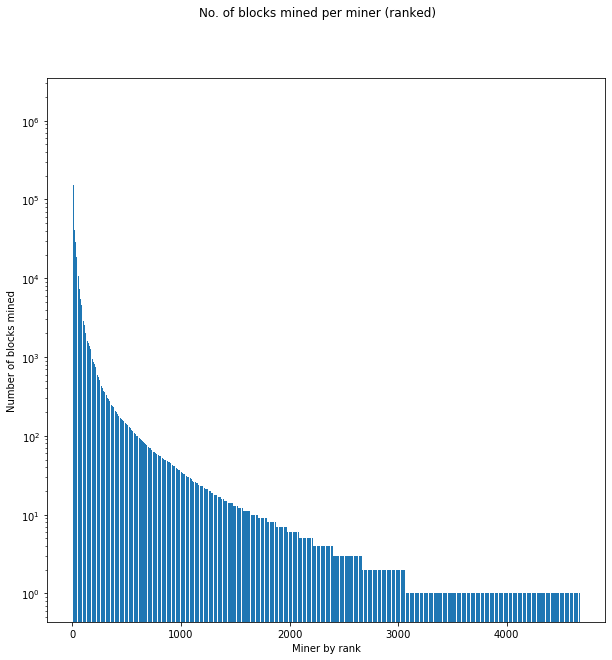

In [85]:
# Graph mining volume by miner 
y_pos = np.arange(len(blocks_list_final))
fig,ax=plt.subplots(figsize=(10,10))
plt.yscale('log')
fig.suptitle('No. of blocks mined per miner (ranked)')
plt.xlabel('Miner by rank')
plt.ylabel('Number of blocks mined')
plt.bar(y_pos,blocks_list_final)

Total number of blocks mined by top 10 miners:6,782,405.0 (77% of all blocks)


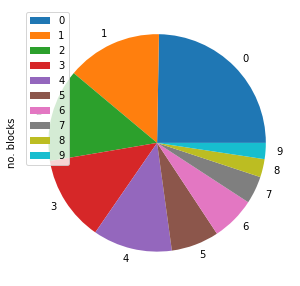

In [91]:
blocks_top10=latest_miners['no. blocks'][:10].sum()
print('Total number of blocks mined by top 10 miners:{:,} ({:.0f}% of all blocks)'.format(blocks_top10,100*blocks_top10/total_blocks))
latest_miners[:10].plot.pie(x='miner_tag',y='no. blocks', figsize=(5, 5))



### Network analysis: How central are leading miners?

**Network Definition**

We define the miner transaction network as a **weighted directed graph** by selecting all transactions done between miners over the period of study. Every miner defines a node and an edge is drawn between two miners if there has ever been a transaction between them. A node A is weighted by the number of blocks mined by it and an edge (A,B) receives a weight equivalent to all the transactions made from A to B. 

In [203]:
# Define nodes, edges and graph
final_edges=edges_evolution[-1]
weighted_nodes=[(x,{'blocks':b}) for x,b in zip(latest_miners['miner_id'],latest_miners['no. blocks'])]
G_final=nx.DiGraph()
G_final.add_nodes_from(weighted_nodes)
G_final.add_edges_from(final_edges)
G_final_edges=[(n1,n2,a['value']) for n1,n2,a in G_final.edges(data=True)]

**Inter miner Transactions**

In [204]:
# Basic transaction Graph Statistics

# TODO: Calculate total transaction volumne (number of transactions)
# TODO: Calculate total miner rewards and the transaction relationship volume as a percentage of this volume

value_trans_list_final=np.sort(np.array([(w['value']/wei_to_eth)*eth_to_usd for e0,e1,w in final_edges]))[::-1]
value_trans_list_final_l=len(value_trans_list_final)

value_trans_final=value_trans_list_final.sum()
value_trans_mean_final=value_trans_list_final.mean()
value_trans_median_final=np.median(value_trans_list_final)

percentile_10=int(value_trans_list_final_l*0.1)
percentile_10_value=value_trans_list_final[:percentile_10+1].sum()
percentile_10_per=(percentile_10_value/value_trans_final)*100

percentile_01=int(value_trans_list_final_l*0.01)
percentile_01_value=value_trans_list_final[:percentile_01+1].sum()
percentile_01_per=(percentile_01_value/value_trans_final)*100

gini_final=gini(value_trans_list_final)



print('Total transaction relationships (connections) between miners: {:,}'.format(len(final_edges)))
print('Total value of transaction relationships: ${:,.0f}'.format(value_trans_final))
print('Mean value of transaction relationship: ${:,.0f}'.format(value_trans_mean_final))
print('Median value of transaction relationship: ${:,.0f}'.format(value_trans_median_final))
print('Value transacted by top 10% of relationships: ${:,.0f} ({:.0f}% of all value)'
      .format(percentile_10_value,percentile_10_per))
print('Value transacted by top 1% of relationships: ${:,.0f} ({:.0f}% of all value)'
      .format(percentile_01_value,percentile_01_per))
print('Gini coefficient of transaction relationships distribution: {:,.3f}'.format(gini_final))



Total transaction relationships (connections) between miners: 5,293
Total value of transaction relationships: $345,313,737
Mean value of transaction relationship: $65,240
Median value of transaction relationship: $1,289
Value transacted by top 10% of relationships: $317,565,506 (92% of all value)
Value transacted by top 1% of relationships: $220,934,830 (64% of all value)
Gini coefficient of transaction relationships distribution: 0.943


<BarContainer object of 5293 artists>

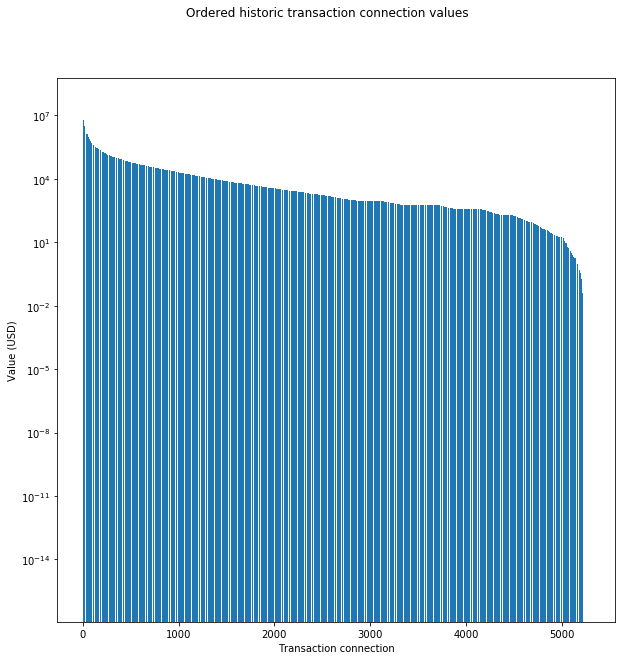

In [205]:
# Graph distribution of transaction values
y_pos = np.arange(len(value_trans_list_final))
fig,ax=plt.subplots(figsize=(10,10))
plt.yscale('log')
fig.suptitle('Ordered historic transaction connection values')
plt.xlabel('Transaction connection')
plt.ylabel('Value (USD)')
plt.bar(y_pos,value_trans_list_final)

In [126]:
# Calculate the value of transactions where the top 10 miners are involved

# Extract all edges that involve top 10 miners
top_10_miners=np.arange(10)
inedges_top10_final=[(n1,n2,a['value']) for n1,n2,a in G_final.in_edges(top_10_miners,data=True)]
outedges_top10_final=[(n1,n2,a['value']) for n1,n2,a in G_final.out_edges(top_10_miners,data=True)]
edges_top10_final=list(set(inedges_top10_final+outedges_top10_final))

# Calculate value of edges from top 10 miners

top10_value_list_final=np.array([t[2] for t in edges_top10_final])
top10_invalue_list_final=np.array([t[2] for t in inedges_top10_final])
top10_outvalue_list_final=np.array([t[2] for t in outedges_top10_final])

top10_invalue_final=(top10_invalue_list_final.sum()/wei_to_eth)*eth_to_usd
top10_outvalue_final=(top10_outvalue_list_final.sum()/wei_to_eth)*eth_to_usd
top10_value_final=(top10_value_list_final.sum()/wei_to_eth)*eth_to_usd


print('Total in-value transacted by top 10 miners: ${:,.0f} ({:.0f}% of all value)'.
      format(top10_invalue_final,100*top10_invalue_final/value_trans_final))

print('Total out-value transacted by top 10 miners: ${:,.0f} ({:.0f}% of all value)'.
      format(top10_outvalue_final,100*top10_outvalue_final/value_trans_final))

print('Total value transacted by top 10 miners: ${:,.0f} ({:.0f}% of all value)'.
      format(top10_value_final,100*top10_value_final/value_trans_final))


Total in-value transacted by top 10 miners: $69,045,825 (20% of all value)
Total out-value transacted by top 10 miners: $156,380,926 (45% of all value)
Total value transacted by top 10 miners: $217,356,194 (63% of all value)


**General Network Structure**

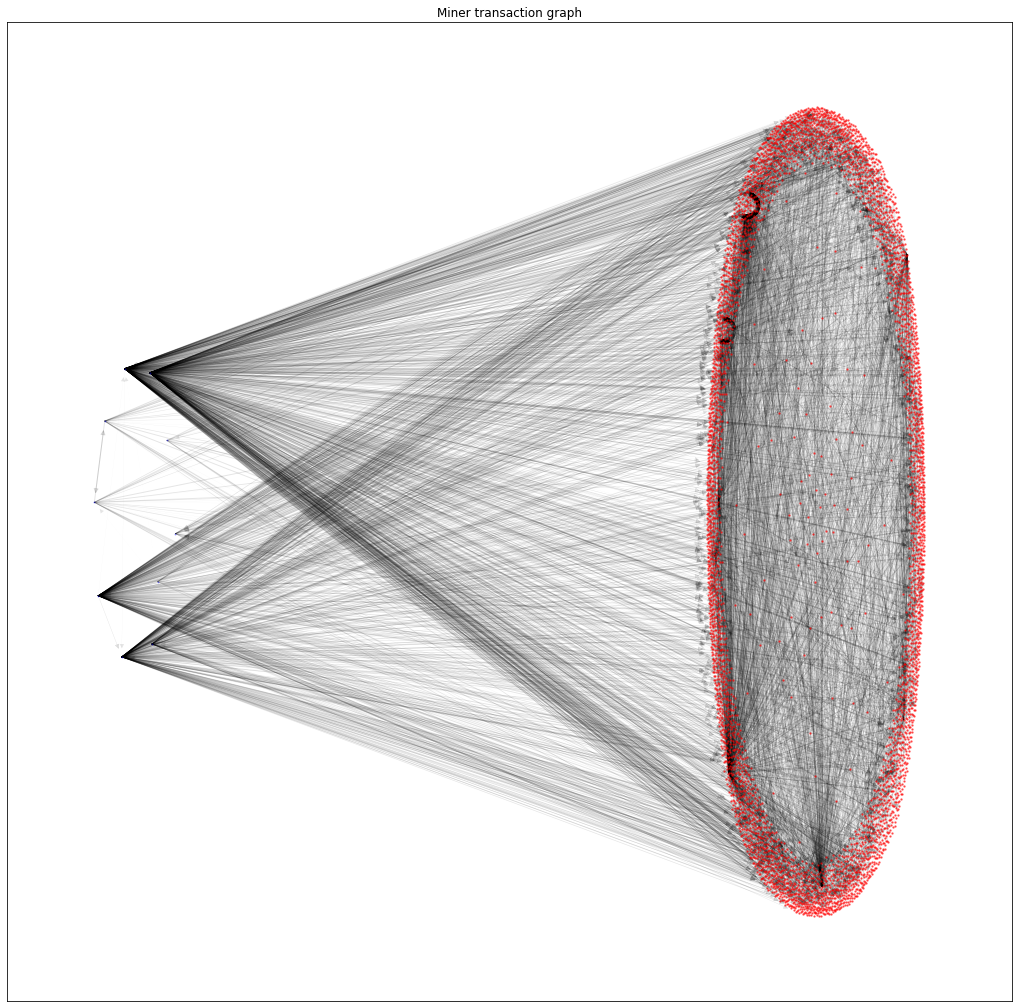

In [132]:
#TODO: Draw graph
fig=plt.figure(figsize=(18,18))
nodes_1=latest_miners['miner_id'][:10].tolist()
nodes_2=latest_miners['miner_id'][10:].tolist()
draw_2node_graph(fig,G_final,nodes_1,nodes_2,G_final.edges(data=True),'value',111,edge_type='')

**Degree distribution**

In [199]:
# Weighted in/out-degree distributions for top 10 nodes
nodes_final=sorted([n for n in G_final.nodes()])
indegree_top10w=np.sort(np.array([d for n,d in G_final.in_degree(top_10_miners,weight='value')])*(eth_to_usd/wei_to_eth))[::-1]
outdegree_top10w=np.sort(np.array([d for n,d in G_final.out_degree(top_10_miners,weight='value')])*(eth_to_usd/wei_to_eth))[::-1]
mean_indegree_top10w=indegree_top10w.mean()
mean_outdegree_top10w=outdegree_top10w.mean()

print('Average weighted in-degree for top 10 nodes: ${:,.0f}'.format(mean_indegree_top10w))
print('Average weighted out-degree for top 10 nodes: ${:,.0f}'.format(mean_outdegree_top10w))


Average weighted in-degree for top 10 nodes: $6,904,582
Average weighted out-degree for top 10 nodes: $15,638,093


In [201]:
# Weighted in/out-degree distributions for bottom nodes (total nodes - top 10 nodes)
bottom_miners=nodes_final[10:]
indegree_bottomw=np.sort(np.array([d for n,d in G_final.in_degree(bottom_miners,weight='value')])*(eth_to_usd/wei_to_eth))[::-1]
outdegree_bottomw=np.sort(np.array([d for n,d in G_final.out_degree(bottom_miners,weight='value')])*(eth_to_usd/wei_to_eth))[::-1]
mean_indegree_bottomw=indegree_bottomw.mean()
mean_outdegree_bottomw=outdegree_bottomw.mean()

print('Average weighted in-degree for bottom nodes: ${:,.0f}'.format(mean_indegree_bottomw))
print('Average weighted out-degree for bottom nodes: ${:,.0f}'.format(mean_outdegree_bottomw))

Average weighted in-degree for bottom nodes: $55,531
Average weighted out-degree for bottom nodes: $37,976


60457076
43592397


<BarContainer object of 4975 artists>

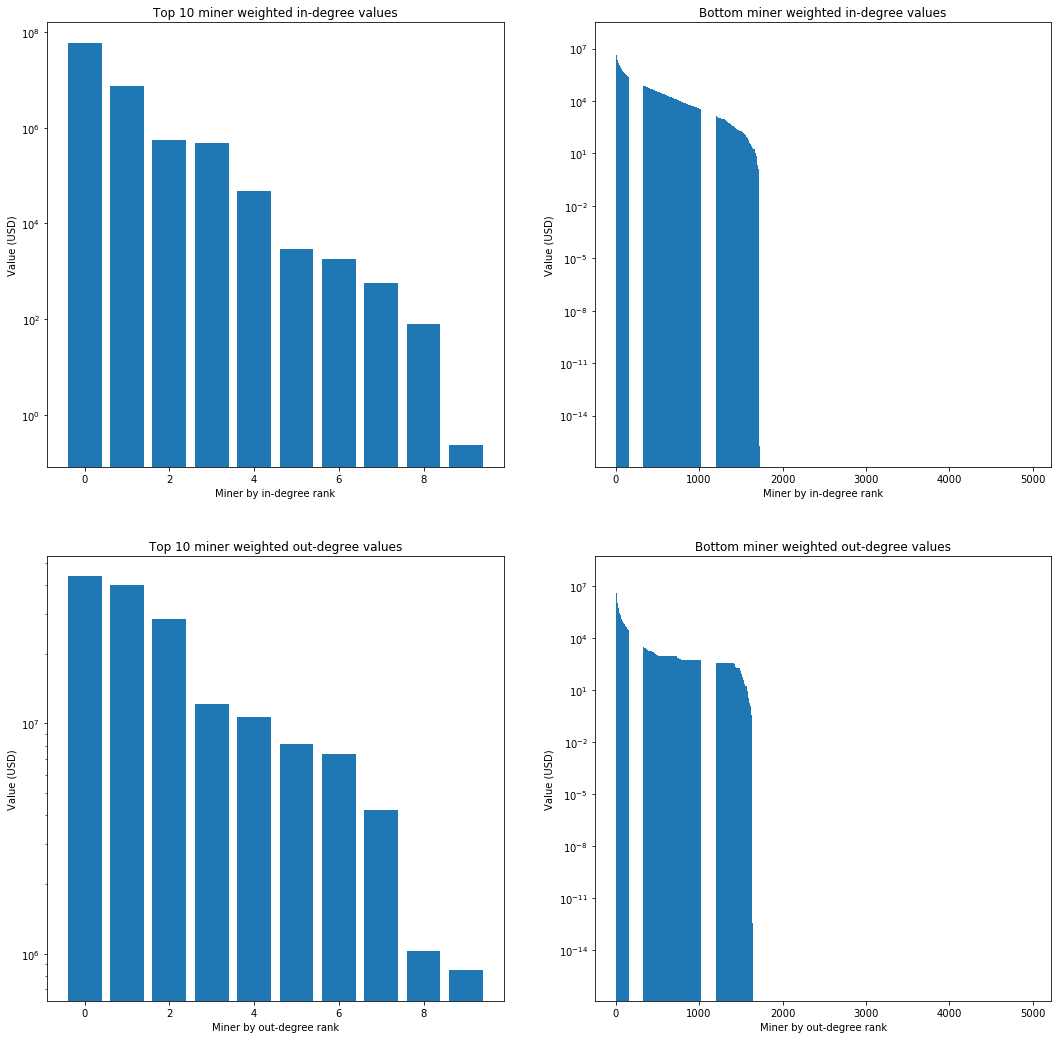

In [202]:
fig=plt.figure(figsize=(18,18))
#plt.gca().set_aspect('equal', adjustable='box')

max_in_degree=int(max(indegree_top10w[0],indegree_bottomw[0]))
print(max_in_degree)

# Plot in-degree weighted distribution for top 10 nodes
ax=fig.add_subplot(221)
#ax.set_ylim(0, max_in_degree)
ax.set_yscale('log')
y_pos = np.arange(len(indegree_top10w))
#plt.yscale('log')
ax.title.set_text('Top 10 miner weighted in-degree values')
plt.xlabel('Miner by in-degree rank')
plt.ylabel('Value (USD)')
plt.bar(y_pos,indegree_top10w)

# Plot in-degree weighted distribution for bottom nodes
ax=fig.add_subplot(222)
#ax.set_ylim(0, max_in_degree)
ax.set_yscale('log')
y_pos = np.arange(len(indegree_bottomw))
#plt.yscale('log')
ax.title.set_text('Bottom miner weighted in-degree values')
plt.xlabel('Miner by in-degree rank')
plt.ylabel('Value (USD)')
plt.bar(y_pos,indegree_bottomw)

max_out_degree=int(max(outdegree_top10w[0],outdegree_bottomw[0]))
print(max_out_degree)

# Plot out-degree weighted distribution for top 10 nodes
ax=fig.add_subplot(223)
#ax.set_ylim(0, max_out_degree)
ax.set_yscale('log')
y_pos = np.arange(len(outdegree_top10w))
#plt.yscale('log')
ax.title.set_text('Top 10 miner weighted out-degree values')
plt.xlabel('Miner by out-degree rank')
plt.ylabel('Value (USD)')
plt.bar(y_pos,outdegree_top10w)

# Plot in-degree weighted distribution for bottom nodes
ax=fig.add_subplot(224)
#ax.set_ylim(0, max_out_degree)
ax.set_yscale('log')
y_pos = np.arange(len(outdegree_bottomw))
#plt.yscale('log')
ax.title.set_text('Bottom miner weighted out-degree values')
plt.xlabel('Miner by out-degree rank')
plt.ylabel('Value (USD)')
plt.bar(y_pos,outdegree_bottomw)



**Degree correlation**

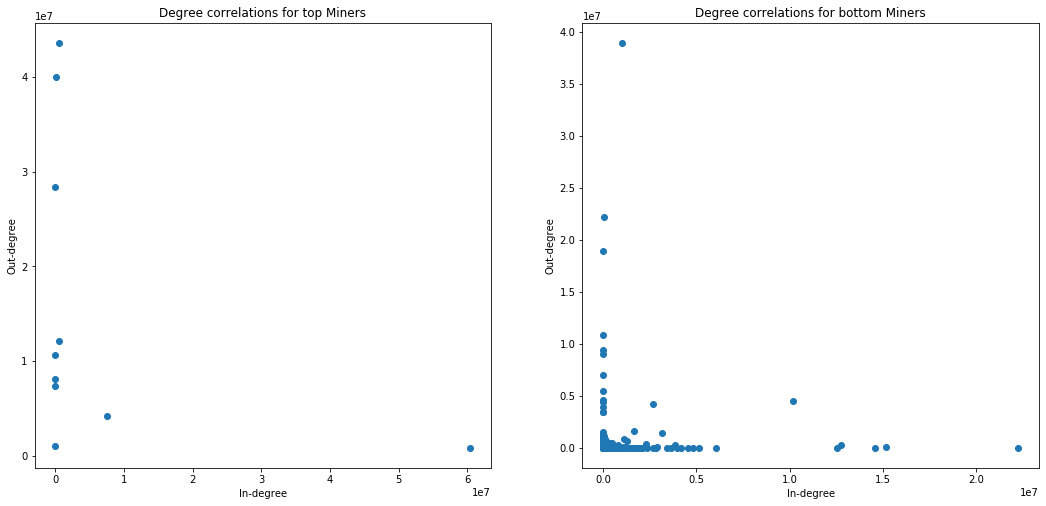

In [196]:
indegree_bottomw=np.array([d for n,d in G_final.in_degree(bottom_miners,weight='value')])*(eth_to_usd/wei_to_eth)
outdegree_bottomw=np.array([d for n,d in G_final.out_degree(bottom_miners,weight='value')])*(eth_to_usd/wei_to_eth)

indegree_top10w=np.array([d for n,d in G_final.in_degree(top_10_miners,weight='value')])*(eth_to_usd/wei_to_eth)
outdegree_top10w=np.array([d for n,d in G_final.out_degree(top_10_miners,weight='value')])*(eth_to_usd/wei_to_eth)



fig=plt.figure(figsize=(18,18))


# Plot in-degree weighted distribution for top nodes
ax=fig.add_subplot(221)
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.yscale('log')
ax.title.set_text('Degree correlations for top Miners')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.scatter(indegree_top10w,outdegree_top10w)

# Plot in-degree weighted distribution for bottom nodes
ax=fig.add_subplot(222)
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.yscale('log')
ax.title.set_text('Degree correlations for bottom Miners')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.scatter(indegree_bottomw,outdegree_bottomw)

In [ ]:
# TODO: Degree correlation

In [ ]:
# TODO: How far down (up) in the hierarchy are the transactions going. Measure the upstream/downstream flow of each node
# TODO: How strong in proportion to their hashing power are certain nodes. 
# (How many times their rewards have they sent or received) and see what role do they play in components and control
# Find price of gas in ether for each block so that ether values are comparable
# TODO: Get value in dollars per transaction at exchange rate at the time to get true measure of econ relationship

**Density**

In [198]:
# Calculate density by components
density_G_final=nx.density(G_final)


G_bottom_miners=G_final.subgraph(bottom_miners)
density_bottom_miners=nx.density(G_bottom_miners)
edges_bottom_miners=[(n1,n2,a['value']) for n1,n2,a in G_bottom_miners.edges(data=True)]
value_bottom_miners=(np.array([e[2] for e in edges_bottom_miners]).sum())*(eth_to_usd/wei_to_eth)

G_top10_miners=G_final.subgraph(top_10_miners)
density_top10_miners=nx.density(G_top10_miners)
edges_top10_miners=[(n1,n2,a['value']) for n1,n2,a in G_top10_miners.edges(data=True)]
value_top10_miners=(np.array([e[2] for e in edges_top10_miners]).sum())*(eth_to_usd/wei_to_eth)

edges_connect=list((set(G_final_edges).difference(set(edges_top10_miners))).difference(set(edges_bottom_miners)))
#edges_connect=list(edges_connect_s10.difference(set(edges_bottom_miners)))
edges_top10_bottom=[e for e in edges_connect if e[0] in list(top_10_miners)]
value_top10_bottom=(np.array([e[2] for e in edges_top10_bottom]).sum())*(eth_to_usd/wei_to_eth)

edges_bottom_top10=[e for e in edges_connect if e[0] in list(bottom_miners)]
value_bottom_top10=(np.array([e[2] for e in edges_bottom_top10]).sum())*(eth_to_usd/wei_to_eth)

print('Density for top 10 miners sub graph: {:.2f}'.format(density_top10_miners))
print('Value transacted between top 10 miners: ${:,.0f}'.format(value_top10_miners))
print('--------')
print('Density for bottom miners sub graph: {:.5f}'.format(density_bottom_miners))
print('Value transacted between bottom miners: ${:,.0f}'.format(value_bottom_miners))
print('--------')
print('Value from top 10 miners to bottom miners: ${:,.0f}'.format(value_top10_bottom))
print('Value from bottom miners to top miners: ${:,.0f}'.format(value_bottom_top10))

print('--------')
print('Checksum: ${:,.0f}'.format(value_bottom_miners+value_top10_miners+value_top10_bottom+value_bottom_top10))
print('Total value: ${:,.0f}'.format(value_trans_final))



Density for top 10 miners sub graph: 0.19
Value transacted between top 10 miners: $8,070,557
--------
Density for bottom miners sub graph: 0.00015
Value transacted between bottom miners: $127,957,543
--------
Value from top 10 miners to bottom miners: $148,310,369
Value from bottom miners to top miners: $60,975,268
--------
Checksum: $345,313,737
Total value: $345,313,737


### Network analysis: Evidence for looking at other actors

**Network Centrality vs. Hashing importance**

**Payment flows in the opposite direction of the hashing hierarchy**

**Potential Domination and Control**

### Network analysis: A more nuanced interpretation

**Components - Direct**

<BarContainer object of 2244 artists>

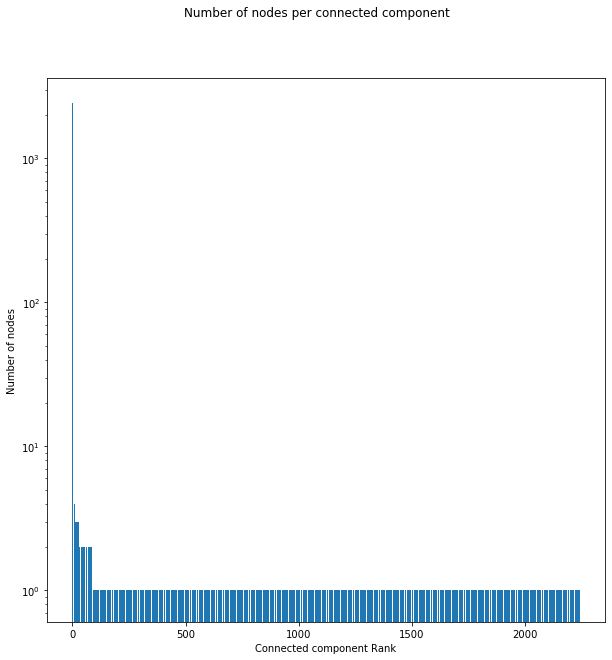

In [6]:
# Define undirected version of Graph
un_G_final=G_final.to_undirected()
un_G_f_comp=[list(c) for c in nx.connected_components(un_G_final)]
un_G_f_comp.sort(key=len,reverse=True)
un_G_f_comp_len=[len(l) for l in un_G_f_comp]


# Plot sizes of strongly connected components
y_pos = np.arange(len(un_G_f_comp_len))
fig,ax=plt.subplots(figsize=(10,10))
plt.yscale('log')
fig.suptitle('Number of nodes per connected component')
plt.xlabel('Connected component Rank')
plt.ylabel('Number of nodes')
plt.bar(y_pos,un_G_f_comp_len)

In [206]:
# Calculate size of GWCC (Gian Weakly Connected Component)
print('Number of weakly connected components: {:,.0f}'.format(len(un_G_f_comp)))



Number of weakly connected components: 2,244


In [216]:
# Analize Giant weakly connected component (GWCC)

G_gwcc_final=G_final.subgraph(un_G_f_comp[0]) #Giant weakly connected component
gwcc_final_blocks=np.array([a['blocks'] for n,a in G_gwcc_final.nodes(data=True)]).sum()
gwcc_final_edges=[(n1,n2,a['value']) for n1,n2,a in G_gwcc_final.edges(data=True)]
gwcc_final_value=np.array([e[2] for e in gwcc_final_edges]).sum()*(eth_to_usd/wei_to_eth)

print('Hash power in GWCC:{:.0f}%'.format((gwcc_final_blocks/total_blocks)*100))
print('Value transacted in GWCC: ${:,.0f} ({:.0f}% of all value)'.
      format(gwcc_final_value,(gwcc_final_value/value_trans_final)*100))

Hash power in GWCC:91%
Value transacted in GWCC: $336,196,576 (97% of all value)


Number of strongly connected components in Giant weakly connected component (GWCC): 2,316
Number of strongly connected components greater than 1 in (GWCC): 73
Hash power in SCCs greater than 1: 40%
Value transacted with and in SCCs greater than 1: $225,916,868 (65% of all value)


<BarContainer object of 2316 artists>

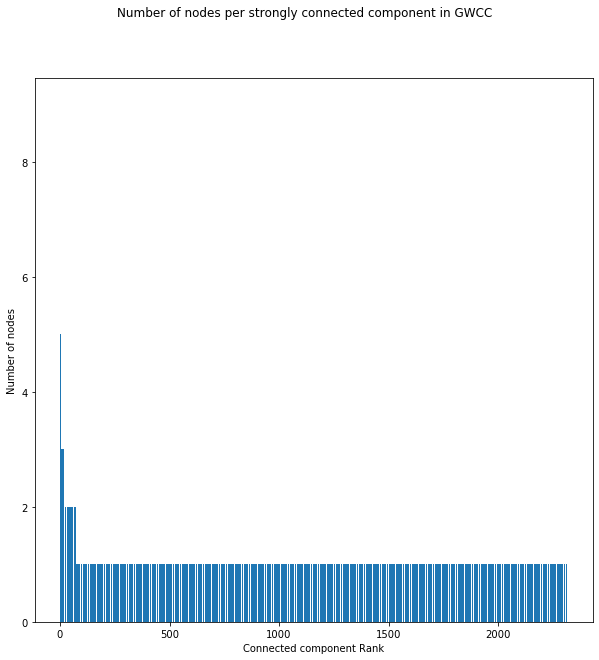

In [231]:
# Analize Strongly Connected Components (SCC) in GWCC

scc_gen=nx.strongly_connected_components(G_gwcc_final) 
scc_lists=[tuple(s) for s in scc_gen] # List of strongly connected components in the gwcc
scc_lists.sort(key=len,reverse=True)

# Graph distribution of sizes of strongly connected components in GWCC

y_pos = np.arange(len(scc_list_len))
fig,ax=plt.subplots(figsize=(10,10))
#plt.yscale('log')
fig.suptitle('Number of nodes per strongly connected component in GWCC')
plt.xlabel('Connected component Rank')
plt.ylabel('Number of nodes')
plt.bar(y_pos,scc_list_len)

In [236]:
# Analize set of SCCs greater than 1
scc_list_len=np.array([len(l) for l in scc_lists])
scc_list_len_1=[l for l in scc_lists if len(l)==1]
scc_list_len_g1=list(set(scc_lists).difference(set(scc_list_len_1)))
scc_g1_nodes=[n for l in scc_list_len_g1 for n in l]

# Number of blocks mined by SCC >1 (how many blocks have they mined)
G_sccg1=G_final.subgraph(scc_g1_nodes)
G_sccg1_blocks=np.array([a['blocks'] for n,a in G_sccg1.nodes(data=True)]).sum()

# Value of transactions that are related with nodes in SCCs greater than 1
sccg1_extedges=[e for e in G_final_edges if ((e[0] in scc_g1_nodes ) or (e[1] in scc_g1_nodes))]
sccg1_ext_value=np.array([e[2] for e in sccg1_extedges]).sum()*(eth_to_usd/wei_to_eth)

print('Number of strongly connected components greater than 1 in (GWCC): {:,}'
      .format(len(scc_lists)-len(scc_list_len_1)))
print('Hash power in SCCs greater than 1: {:.0f}%'.format((G_sccg1_blocks/total_blocks)*100))
print('Value transacted with and in SCCs greater than 1: ${:,.0f} ({:.0f}% of all value)'.
      format(sccg1_ext_value,(sccg1_ext_value/value_trans_final)*100))


Number of strongly connected components greater than 1 in (GWCC): 73
Hash power in SCCs greater than 1: 40%
Value transacted with and in SCCs greater than 1: $225,916,868 (65% of all value)


**Components - Flow (Bow tie)**

In [235]:
# Analize bowtie structure 
G_gwcc_out_nodes=[n for n in G_gwcc_final.nodes() if G_gwcc_final.in_degree(n)==0]
G_gwcc_in_nodes=[n for n in G_gwcc_final.nodes() if G_gwcc_final.out_degree(n)==0]
print(len(G_gwcc_out_nodes))
print(len(G_gwcc_in_nodes))

876
1136


**Condensed components: Flow, Power and control**

In [88]:
condensation_final=nx.condensation(gwcc,scc_nodes) # Graph that compresses all connected components into a node
print(len(condensation.edges()))

4107


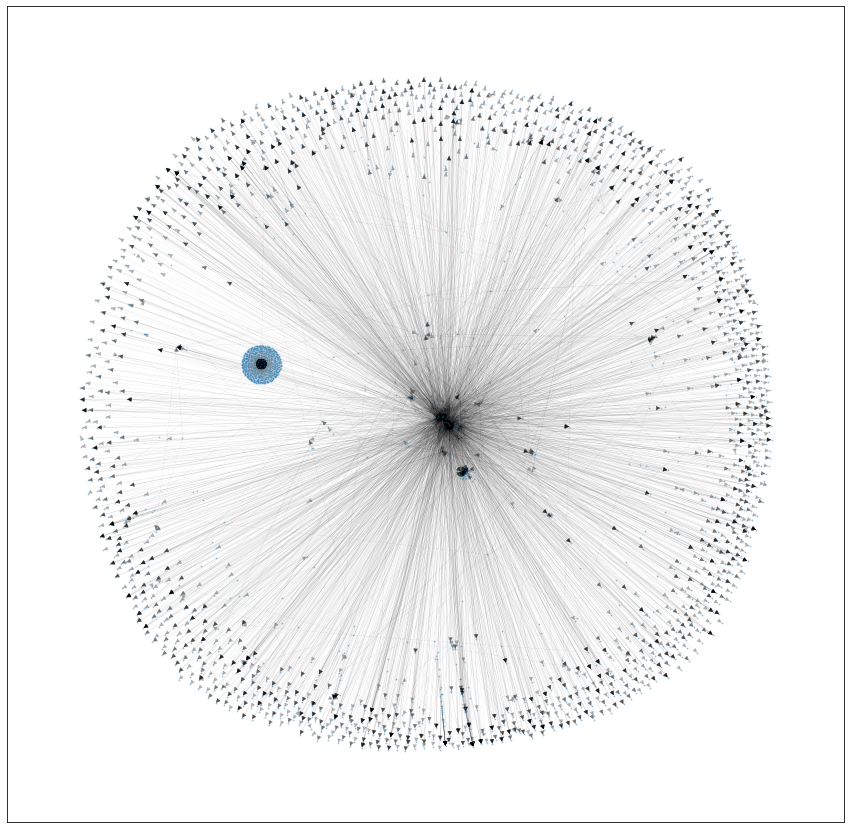

In [89]:
# Draw condensation graph
fig,ax=plt.subplots(figsize=(15,15))
nx.drawing.nx_pylab.draw_networkx(condensation,with_labels=False,ax=ax,node_size=1,width=0.1,alpha=0.3)

In [91]:
#Strongly connected components in condensation
condensation_scc_gen=nx.strongly_connected_components(condensation)
condensation_scc_nodes=[list(s) for s in condensation_scc_gen]
print(len(condensation.nodes()))
print(condensation_scc_nodes[:10])

2316
[[73], [74], [188], [189], [80], [190], [191], [192], [83], [193]]


In [92]:
cond_out_degrees=condensation.out_degree()
cond_in_degrees=condensation.in_degree()


In [102]:

cond_out=[t[0] for t in cond_out_degrees if t[1]>0]
cond_in=[t[0] for t in cond_in_degrees if t[1]>0]
cond_in_out=list(set(cond_out).intersection(set(cond_in)))
print('Input component size={}'.format(len(cond_out)-len(cond_in_out)))
print('Output component size={}'.format(len(cond_in)-len(cond_in_out)))
print('In and out component size={}'.format(len(cond_in_out)))

Input component size=906
Output component size=1219
In and out component size=191


In [ ]:
#TODO analyze components and define bow tie structure
# TODO: Where in the Bowtie do the big players lie? 

In [56]:
#TODO distribution of hashpower by component
print(np.array(un_G_f_comp_len).sum()) #Total miners in connected components

4985


All miners have transacted at least once with another miner. 

**Communities** (Not useful)

In [238]:
communities_G_final=nx.algorithms.community.label_propagation.asyn_lpa_communities(G_final, weight='value')

In [239]:
communities_G_final=[c for c in communities_G_final]
print('Size of communities: {}'.format(len(communities_G_final)))

Size of communities: 3502


## Appendix Functions

In [128]:
#Function that plots a network graph from two lists of nodes, one list of edges and a variable to define edge width

def draw_2node_graph(fig,G,nodes_1,nodes_2,edges,edge_width_v,subplot_q,edge_type=''):


    init_edges=len(edges)
    trimmed_edges=len(edges)
    
    # Define circular layout 
    pos_o=nx.spring_layout(nodes_1, scale=0.3,center=(0,5))
    pos_n=nx.spring_layout(nodes_2, scale=0.8,center=(5,5))
    total_pos=pos_o
    total_pos.update(pos_n)


    # Define transactions to show (incoming edges)

    values=np.array([d[edge_width_v] for _,_,d in edges])
    max_value=np.max(values)
    values=values/max_value
    values_per=np.array([percentileofscore(values,v,'rank') for v in values])/100

    
    # Draw nodes and edges
    ax=fig.add_subplot(subplot_q)
    ax.title.set_text('Miner transaction graph')
    nx.draw_networkx_nodes(G, total_pos, nodelist=nodes_1, node_size=1, node_color='blue', alpha=0.3)
    nx.draw_networkx_nodes(G, total_pos, nodelist=nodes_2, node_size=2, node_color='red', alpha=0.5)
    nx.draw_networkx_edges(G,total_pos,edgelist=edges,alpha=0.1,width=values_per)
    
    return

In [31]:
# Function to calculate gini coefficient taken from https://stackoverflow.com/questions/48999542/more-efficient-weighted-gini-coefficient-in-python

def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

### Notes

In [ ]:
# Alternative network diagram
#fig,ax=plt.subplots(figsize=(18,18))
#nx.drawing.nx_pylab.draw_networkx(G_final,with_labels=False,ax=ax,node_size=1,width=0.1,alpha=0.3)